In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Elbow Method to determine optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

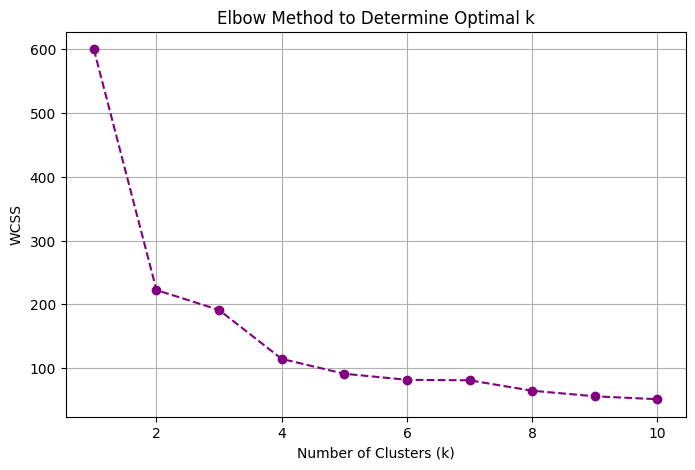

In [5]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='purple')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [6]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [7]:
# Add cluster labels to the DataFrame
X['Cluster'] = clusters

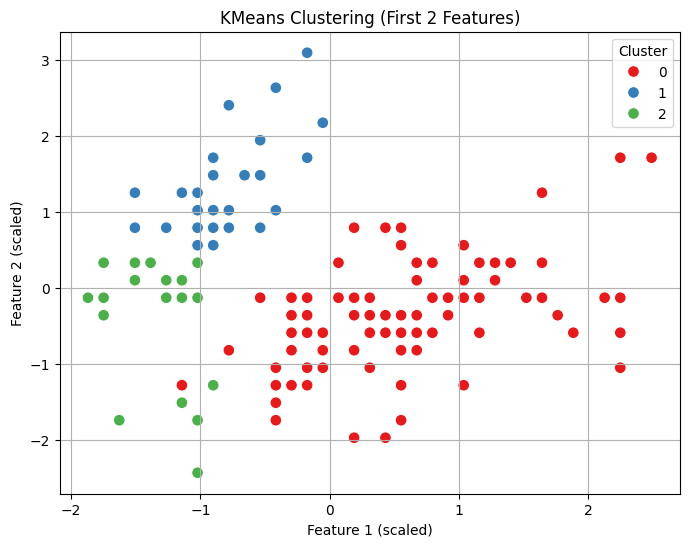

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='Set1', s=70)
plt.title("KMeans Clustering (First 2 Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [9]:
# Test new data points
new_data = np.array([
    [5.1, 3.5, 1.4, 0.2],   # Likely Cluster 0
    [6.7, 3.1, 4.7, 1.5],   # Likely Cluster 1
    [7.2, 3.6, 6.1, 2.5]    # Likely Cluster 2
])

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict cluster for new data
predicted_clusters = kmeans.predict(new_data_scaled)
print("Predicted clusters for new data:", predicted_clusters)

Predicted clusters for new data: [1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
